In [29]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn
seaborn.set()


In [30]:
df = pd.read_csv("questionnaire-answers-per-clip.csv")
df

,Unnamed: 0,clipName,pptID,condition,gettingOnWell,relationshipBetweenCharacters,workingTogether,leftDominant,rightDominant,leftCooperative,...,leftFearful,rightFearful,leftSad,rightSad,leftContent,rightContent,leftAngry,rightAngry,leftAmused,rightAmused
0,0,1Laugh1PushAway,55,4,0.0,0.0,0.0,4.0,4.0,4.0,...,3.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
1,1,1Laugh1PushAway,87,4,1.0,0.0,2.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0
2,2,1Laugh1PushAway,118,2,0.0,0.0,0.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,3.0
3,3,1Laugh1PushAway,136,2,2.0,0.0,2.0,1.0,3.0,1.0,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0
4,4,1Laugh1PushAway,417,4,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0
5,5,1Laugh1PushAway,681,4,1.0,1.0,2.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,4.0,2.0
6,6,1Laugh1PushAway,695,4,0.0,0.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,3.0
7,7,1Laugh1PushAway,1031,4,2.0,2.0,2.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,3.0,1.0
8,8,1Laugh1PushAway,1315,4,1.0,0.0,0.0,0.0,4.0,0.0,...,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,1.0
9,9,1Laugh1PushAway,1460,2,0.0,0.0,0.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0


## PCA for dimensionality reduction

This could be improved by:
- performing a LDA on top of the PCA as well (-> to minimize intra-class - ie 'same clip' - distance while maximizing inter-class distances) (it needs to be done 'on top of the PCA' because a LDA typically requires O > 3 F with O the number of observations per class (here ~26) and F the number of features (25 questions) -> using first a PCA, F can be brought down to 5-6 for instance)
- using the results of the EFA to have a better embedding?


In [31]:
from sklearn.decomposition import PCA

In [32]:
training_df=df[df["condition"]==2] # skeleton only
training=training_df.T.iloc[4:].T.values
training_labels=training_df["clipName"].values
testing_df=df[df["condition"]==4] # full scene
testing=testing_df.T.iloc[4:].T.values
testing_labels=testing_df["clipName"].values

In [33]:
training.shape

(276, 25)

In [34]:
pca=PCA(n_components=5)
pca.fit(training)

training_pca = pca.transform(training)
testing_pca = pca.transform(testing)

## Plotting of the embeding

`plot_embedding` plots each questionnaire's response when projected along the first 2 eigenvectors. Responses' colours correspond to the clips.

In [35]:
def plot_embedding(X, labels):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        ax.plot(X[i, 0], X[i, 1], marker="o", linestyle="",label=labels[i])

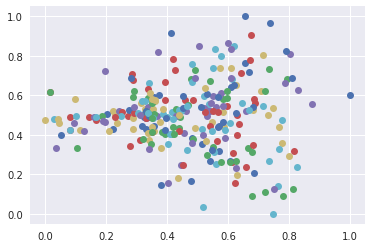

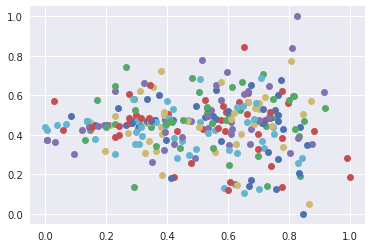

In [36]:
plot_embedding(training_pca, training_labels) 
plot_embedding(testing_pca, testing_labels)

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.28405715, 0.41658333, 0.51708521, 0.57579546, 0.62923102])

In [19]:
pca.components_


array([[ 0.17548592,  0.15016615,  0.14538466,  0.05376097,  0.13633354,
        -0.21093684, -0.2386643 ,  0.17641636,  0.23302474, -0.21699709,
        -0.25971502,  0.19025137,  0.27863681, -0.15274028, -0.11062468,
         0.20882575,  0.18131997,  0.18626668,  0.16037721, -0.23449424,
        -0.24284952,  0.2457872 ,  0.30775015, -0.14672371, -0.16033606],
       [ 0.01357949,  0.01438256,  0.02452207,  0.42994249, -0.41896846,
        -0.18209335,  0.0747369 ,  0.32136526, -0.2173944 , -0.13951877,
         0.07173952,  0.3495939 , -0.24967575,  0.0014334 , -0.1105479 ,
        -0.21517212,  0.26782144, -0.12600513,  0.1804615 ,  0.07111757,
        -0.04827713,  0.15283523, -0.13380643,  0.10641266,  0.03883441],
       [-0.14391971, -0.11048205, -0.18594399,  0.05503047,  0.2185336 ,
         0.13508949,  0.12723342,  0.30134902,  0.27324022,  0.21053698,
         0.21047521,  0.22557171,  0.28653153,  0.08431671,  0.12230118,
         0.19236272,  0.16733776,  0.12434086,  0

# Classification

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC(kernel='rbf')
clf.fit(training, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
for p, l in zip(clf.predict(testing), testing_labels):
    print("%s (should be %s)" % (p,l))



1Laughing (should be 1Laugh1PushAway)
1Laugh1PushAway (should be 1Laugh1PushAway)
1Laugh1PushAway (should be 1Laugh1PushAway)
bothDistressedTable (should be 1Laugh1PushAway)
1Laughing (should be 1Laugh1PushAway)
1Laugh1PushAway (should be 1Laugh1PushAway)
bothDistressedTable (should be 1Laugh1PushAway)
1Task1Watch (should be 1Laugh1PushAway)
1StopsOtherPlay (should be 1Laugh1PushAway)
1Laughing (should be 1Laugh1PushAway)
1Laughing (should be 1Laugh1PushAway)
1Laughing (should be 1Laugh1PushAway)
1Laugh1PushAway (should be 1Laugh1PushAway)
1Task1Watch (should be 1Laughing)
1Laughing (should be 1Laughing)
1Laughing (should be 1Laughing)
1Task1Watch (should be 1Laughing)
1Laughing (should be 1Laughing)
bothDistressedTable (should be 1Laughing)
1Laughing (should be 1Laughing)
1Laughing (should be 1Laughing)
1Task1Watch (should be 1Laughing)
1Laughing (should be 1Laughing)
1Laughing (should be 1Laughing)
1Laughing (should be 1Laughing)
1Laughing (should be 1Laughing)
bothDistressedTable (s

In [22]:
clf.score(testing, testing_labels)

0.11594202898550725